In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the datasets
customer_data = pd.read_csv('customer_profile.csv')
transaction_data = pd.read_csv('transactional_data.csv')
address_data = pd.read_csv('customer_address_and_zip_mapping.csv')
cost_data = pd.read_csv('delivery_cost_data.csv')
# Count unique CUSTOMER_NUMBER in transaction data
unique_customers_transaction = transaction_data['CUSTOMER_NUMBER'].nunique()

# Count unique ZIP_CODE in customer profile data
unique_zip_customer = customer_data['ZIP_CODE'].nunique()

# Find customers present in customer_data but not in transaction_data
inactive_customers = set(customer_data['CUSTOMER_NUMBER']) - set(transaction_data['CUSTOMER_NUMBER'])
# Find ZIP codes present in customer_data but not in address_data
unmatched_zips = set(customer_data['ZIP_CODE']) - set(address_data['zip'])

print(f"Total Rows in cost_Data: {len(cost_data)}")
print(f"Total Customers in Profile Data: {len(customer_data)}")
print(f"Total Customers in Transaction Data: {len(transaction_data)}")
print(f"Total Unique Customers in Transactions: {unique_customers_transaction}")
print(f"Total Unique ZIP Codes in Customer Data: {unique_zip_customer}")
print(f"Inactive Customers (no transactions): {len(inactive_customers)}")
print(f"Unmatched ZIP Codes (missing in address mapping): {len(unmatched_zips)}")

Total Rows in cost_Data: 160
Total Customers in Profile Data: 30478
Total Customers in Transaction Data: 1045540
Total Unique Customers in Transactions: 30322
Total Unique ZIP Codes in Customer Data: 1801
Inactive Customers (no transactions): 156
Unmatched ZIP Codes (missing in address mapping): 0


In [3]:
# Inspect the structure of each dataset
print("Customer Profile Data Info:")
print(customer_data.info())
print("\nTransactional Data Info:")
print(transaction_data.info())

print("\nAddress Mapping Data Info:")
print(address_data.info())
print("\nDelivery Cost Data Info:")
print(cost_data.info())
# ### Preview first few rows

print("Customer Profile Sample:\n", customer_data.head())
print("Transactional Data Sample:\n", transaction_data.head())
print("Address Mapping Sample:\n", address_data.head())

# ### Check data type and consistency 
print("Customer Profile Data Types:\n", customer_data.dtypes)
print("Transactional Data Data Types:\n", transaction_data.dtypes)
print("Address Mapping Data Types:\n", address_data.dtypes)

Customer Profile Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMER_NUMBER       30478 non-null  int64  
 1   PRIMARY_GROUP_NUMBER  12282 non-null  float64
 2   FREQUENT_ORDER_TYPE   30478 non-null  object 
 3   FIRST_DELIVERY_DATE   30478 non-null  object 
 4   ON_BOARDING_DATE      30478 non-null  object 
 5   COLD_DRINK_CHANNEL    30478 non-null  object 
 6   TRADE_CHANNEL         30478 non-null  object 
 7   SUB_TRADE_CHANNEL     30478 non-null  object 
 8   LOCAL_MARKET_PARTNER  30478 non-null  bool   
 9   CO2_CUSTOMER          30478 non-null  bool   
 10  ZIP_CODE              30478 non-null  int64  
dtypes: bool(2), float64(1), int64(2), object(6)
memory usage: 2.2+ MB
None

Transactional Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045540 entries, 0 to 1045539
Data columns (tota

In [4]:
## Fix the datatype:
## Customer profile data
customer_data['CUSTOMER_NUMBER'] = customer_data['CUSTOMER_NUMBER'].astype(str)
customer_data['ZIP_CODE'] = customer_data['ZIP_CODE'].astype(str)
customer_data['FREQUENT_ORDER_TYPE'] = customer_data['FREQUENT_ORDER_TYPE'].astype('category')
customer_data['TRADE_CHANNEL'] = customer_data['TRADE_CHANNEL'].astype('category')
customer_data['FIRST_DELIVERY_DATE'] = pd.to_datetime(customer_data['FIRST_DELIVERY_DATE'], errors='coerce')
customer_data['ON_BOARDING_DATE'] = pd.to_datetime(customer_data['ON_BOARDING_DATE'], errors='coerce')

## Transactional data:
transaction_data['TRANSACTION_DATE'] = pd.to_datetime(transaction_data['TRANSACTION_DATE'], errors='coerce')
transaction_data['CUSTOMER_NUMBER'] = transaction_data['CUSTOMER_NUMBER'].astype(str)
transaction_data['ORDER_TYPE'] = transaction_data['ORDER_TYPE'].astype('category')

## Address data:
address_data['zip'] = address_data['zip'].astype(str)

## Delivery Cost Data:
cost_data['Cold Drink Channel'] = cost_data['Cold Drink Channel'].astype('category')
cost_data['Vol Range'] = cost_data['Vol Range'].astype('category')
cost_data['Applicable To'] = cost_data['Applicable To'].astype('category')
cost_data['Cost Type'] = cost_data['Cost Type'].astype('category')

# Convert Median Delivery Cost to numeric
cost_data['Median Delivery Cost'] = pd.to_numeric(cost_data['Median Delivery Cost'], errors='coerce')



Dataset: Customer_Data
Total Rows: 30478
Total Duplicate Rows: 0
Missing Values Summary:
               Variable  Missing Values  Percentage
1  PRIMARY_GROUP_NUMBER           18196    59.70208


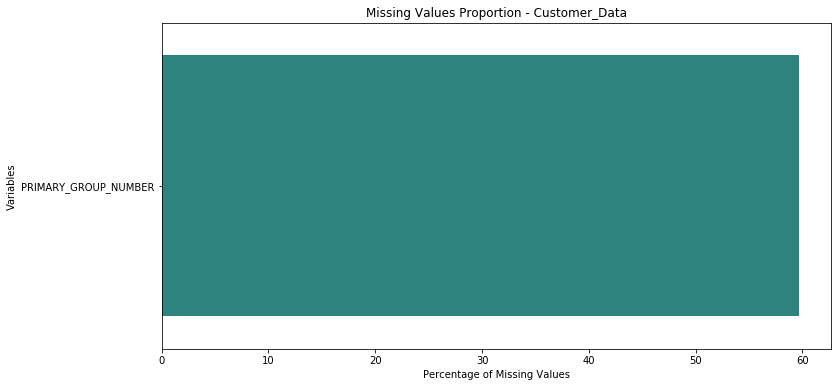


Dataset: Transactional Data
Total Rows: 1045540
Total Duplicate Rows: 0
Missing Values Summary:
     Variable  Missing Values  Percentage
4  ORDER_TYPE           11131    1.064617


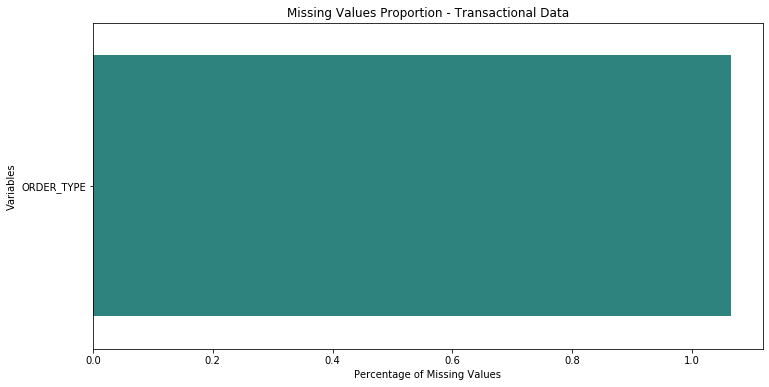


Dataset: Address Mapping Data
Total Rows: 1801
Total Duplicate Rows: 0
No missing values found.

Dataset: Cost Data
Total Rows: 160
Total Duplicate Rows: 0
No missing values found.


(               Variable  Missing Values  Percentage
 1  PRIMARY_GROUP_NUMBER           18196    59.70208,
 0,
      Variable  Missing Values  Percentage
 4  ORDER_TYPE           11131    1.064617,
 0,
 Empty DataFrame
 Columns: [Variable, Missing Values, Percentage]
 Index: [],
 0,
 Empty DataFrame
 Columns: [Variable, Missing Values, Percentage]
 Index: [],
 0)

In [5]:
datasets = {
    "customer_data": pd.read_csv("customer_profile.csv"),
    "transaction_data": pd.read_csv("transactional_data.csv"),
    "address_data": pd.read_csv("customer_address_and_zip_mapping.csv"),
    "cost_data": pd.read_csv("delivery_cost_data.csv")
}

def analyze_missing_and_duplicates(df, dataset_name):
    # Calculate missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # Create a dataframe for missing values
    missing_df = pd.DataFrame({
        'Variable': df.columns,
        'Missing Values': missing_values.values,
        'Percentage': missing_percentage.values
    })

    # Filter only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()

    # Print summary
    print(f"\nDataset: {dataset_name}")
    print(f"Total Rows: {len(df)}")
    print(f"Total Duplicate Rows: {duplicate_rows}")
    
    if not missing_df.empty:
        print("Missing Values Summary:")
        print(missing_df)

        # Plot missing values
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Percentage', y='Variable', data=missing_df, palette='viridis')
        plt.title(f'Missing Values Proportion - {dataset_name}')
        plt.xlabel('Percentage of Missing Values')
        plt.ylabel('Variables')
        plt.show()
    else:
        print("No missing values found.")
    
    return missing_df, duplicate_rows

# Analyze each dataset
customer_missing, customer_duplicates = analyze_missing_and_duplicates(datasets['customer_data'], 'Customer_Data')
transaction_missing, transaction_duplicates = analyze_missing_and_duplicates(datasets['transaction_data'], 'Transactional Data')
address_missing, address_duplicates = analyze_missing_and_duplicates(datasets['address_data'], 'Address Mapping Data')
Deivery_cost_missing, cost_duplicates = analyze_missing_and_duplicates(datasets['cost_data'], 'Cost Data')
# Return summary results
customer_missing, customer_duplicates, transaction_missing, transaction_duplicates, address_missing, address_duplicates,Deivery_cost_missing, cost_duplicates

> The column PRIMARY_GROUP_NUMBER has 18,196 missing values, which accounts for 59.70% of the total data.
There are 11,131 missing values in transactional data, which accounts for 1.06% of the total data,  the impact on analysis and modeling may be minimal.


#### Handling Missing Values:

In [6]:
# Convert to categorical if not already
datasets['transaction_data']['ORDER_TYPE'] = datasets['transaction_data']['ORDER_TYPE'].astype('category')

# Add 'Unknown' as a category and fill missing values
datasets['transaction_data']['ORDER_TYPE'] = datasets['transaction_data']['ORDER_TYPE'].cat.add_categories('Unknown')
datasets['transaction_data']['ORDER_TYPE'].fillna('Unknown', inplace=True)


In [7]:
# Customers with Missing PRIMARY_GROUP_NUMBER
missing_primary_group_customers = datasets['customer_data']["PRIMARY_GROUP_NUMBER"].isnull()
print(missing_primary_group_customers)
num_missing = datasets['customer_data']["PRIMARY_GROUP_NUMBER"].isnull().sum()
print(f"Number of customers with missing PRIMARY_GROUP_NUMBER: {num_missing}")
datasets['customer_data']["PRIMARY_GROUP_NUMBER"].fillna("Unknown", inplace=True)


0        False
1         True
2        False
3        False
4        False
         ...  
30473     True
30474     True
30475     True
30476     True
30477    False
Name: PRIMARY_GROUP_NUMBER, Length: 30478, dtype: bool
Number of customers with missing PRIMARY_GROUP_NUMBER: 18196


### Verify changes:

In [8]:
print("Missing values in ORDER_TYPE after imputation:", datasets['transaction_data']['ORDER_TYPE'].isnull().sum())
print("Missing values in PRIMARY_GROUP_NUMBER after imputation:", datasets['customer_data']['PRIMARY_GROUP_NUMBER'].isnull().sum())


Missing values in ORDER_TYPE after imputation: 0
Missing values in PRIMARY_GROUP_NUMBER after imputation: 0


In [9]:
transaction_data = datasets['transaction_data']
customer_data = datasets['customer_data']
cost_data = datasets['cost_data']
address_data = datasets['address_data']
print(transaction_data['ORDER_TYPE'].isnull().sum())

0


### Sales and volume trend analysis:

## Daily, Monthly, and Yearly Trends

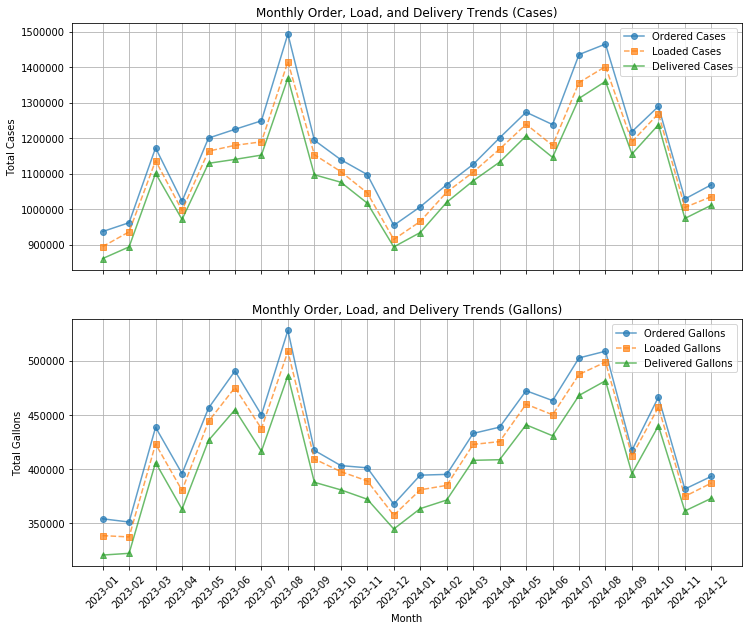

In [10]:
#Monthly Trends (Cases & Gallons)
#Monthly Trends (Cases & Gallons)
transaction_data['TRANSACTION_DATE'] = pd.to_datetime(transaction_data['TRANSACTION_DATE'], errors='coerce')
# Extract month-year for monthly analysis
transaction_data['MONTH'] = transaction_data['TRANSACTION_DATE'].dt.to_period('M').astype(str)

# Aggregate by month
monthly_trends = transaction_data.groupby('MONTH')[
    ['ORDERED_CASES', 'LOADED_CASES', 'DELIVERED_CASES', 'ORDERED_GALLONS', 'LOADED_GALLONS', 'DELIVERED_GALLONS']
].sum()

# Convert period index to string for plotting
monthly_trends.index = monthly_trends.index.astype(str)

# Create figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot cases trend
axes[0].plot(monthly_trends.index, monthly_trends['ORDERED_CASES'], marker='o', linestyle='-', label='Ordered Cases', alpha=0.7)
axes[0].plot(monthly_trends.index, monthly_trends['LOADED_CASES'], marker='s', linestyle='--', label='Loaded Cases', alpha=0.7)
axes[0].plot(monthly_trends.index, monthly_trends['DELIVERED_CASES'], marker='^', linestyle='-', label='Delivered Cases', alpha=0.7)
axes[0].set_ylabel('Total Cases')
axes[0].set_title('Monthly Order, Load, and Delivery Trends (Cases)')
axes[0].legend()
axes[0].grid(True)

# Plot gallons trend
axes[1].plot(monthly_trends.index, monthly_trends['ORDERED_GALLONS'], marker='o', linestyle='-', label='Ordered Gallons', alpha=0.7)
axes[1].plot(monthly_trends.index, monthly_trends['LOADED_GALLONS'], marker='s', linestyle='--', label='Loaded Gallons', alpha=0.7)
axes[1].plot(monthly_trends.index, monthly_trends['DELIVERED_GALLONS'], marker='^', linestyle='-', label='Delivered Gallons', alpha=0.7)
axes[1].set_ylabel('Total Gallons')
axes[1].set_title('Monthly Order, Load, and Delivery Trends (Gallons)')
axes[1].legend()
axes[1].grid(True)

plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()



> Delivered cases are consistently lower than ordered cases.


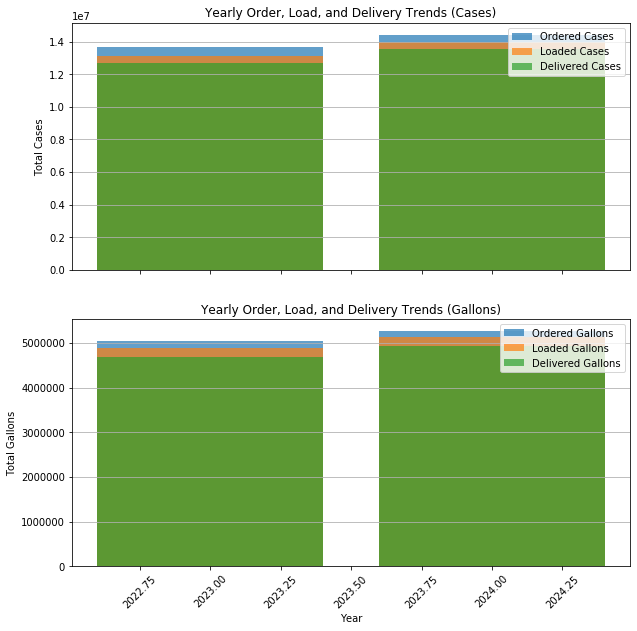

In [12]:
# Yearly Trends (Cases & Gallons)
# Aggregate by year
yearly_trends = transaction_data.groupby('YEAR')[
    ['ORDERED_CASES', 'LOADED_CASES', 'DELIVERED_CASES', 'ORDERED_GALLONS', 'LOADED_GALLONS', 'DELIVERED_GALLONS']
].sum()

# Create figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Plot cases trend (using Matplotlib instead of pandas' built-in plotting)
axes[0].bar(yearly_trends.index, yearly_trends['ORDERED_CASES'], label='Ordered Cases', alpha=0.7)
axes[0].bar(yearly_trends.index, yearly_trends['LOADED_CASES'], label='Loaded Cases', alpha=0.7)
axes[0].bar(yearly_trends.index, yearly_trends['DELIVERED_CASES'], label='Delivered Cases', alpha=0.7)
axes[0].set_ylabel('Total Cases')
axes[0].set_title('Yearly Order, Load, and Delivery Trends (Cases)')
axes[0].legend()
axes[0].grid(axis='y')

# Plot gallons trend
axes[1].bar(yearly_trends.index, yearly_trends['ORDERED_GALLONS'], label='Ordered Gallons', alpha=0.7)
axes[1].bar(yearly_trends.index, yearly_trends['LOADED_GALLONS'], label='Loaded Gallons', alpha=0.7)
axes[1].bar(yearly_trends.index, yearly_trends['DELIVERED_GALLONS'], label='Delivered Gallons', alpha=0.7)
axes[1].set_ylabel('Total Gallons')
axes[1].set_title('Yearly Order, Load, and Delivery Trends (Gallons)')
axes[1].legend()
axes[1].grid(axis='y')

plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

>  The delivered amounts (green) closely match the ordered and loaded amounts, indicating a high fulfillment rate.

In [13]:
# Group by Transaction Date and Aggregate Ordered & Delivered Cases & Gallons
daily_fulfillment = transaction_data.groupby('TRANSACTION_DATE')[
    ['ORDERED_CASES', 'DELIVERED_CASES', 'ORDERED_GALLONS', 'DELIVERED_GALLONS']
].sum()

# Avoid division by zero: Set FULFILLMENT_RATE to NaN if ORDERED_CASES == 0
daily_fulfillment['FULFILLMENT_RATE_CASES'] = daily_fulfillment['DELIVERED_CASES'] / daily_fulfillment['ORDERED_CASES']
daily_fulfillment['FULFILLMENT_RATE_GALLONS'] = daily_fulfillment['DELIVERED_GALLONS'] / daily_fulfillment['ORDERED_GALLONS']

# Handle division by zero
daily_fulfillment.loc[daily_fulfillment['ORDERED_CASES'] == 0, 'FULFILLMENT_RATE_CASES'] = np.nan
daily_fulfillment.loc[daily_fulfillment['ORDERED_GALLONS'] == 0, 'FULFILLMENT_RATE_GALLONS'] = np.nan

# Replace Infinite Values (caused by division by zero) with NaN
daily_fulfillment.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where both fulfillment rates are NaN (optional)
daily_fulfillment.dropna(subset=['FULFILLMENT_RATE_CASES', 'FULFILLMENT_RATE_GALLONS'], how='all', inplace=True)

# Sort by date
daily_fulfillment = daily_fulfillment.sort_index()

print(daily_fulfillment)


                  ORDERED_CASES  DELIVERED_CASES  ORDERED_GALLONS  \
TRANSACTION_DATE                                                    
2023-01-01          2040.000000      2040.000000         0.000000   
2023-01-02            18.750000        13.750000        15.000000   
2023-01-03         32914.638124     30334.722624     12803.255981   
2023-01-04         48788.976558     43548.784748     17656.913747   
2023-01-05         47334.356213     43585.074527     19964.134469   
...                         ...              ...              ...   
2024-12-27         40893.250000     38694.130000     17466.882472   
2024-12-28          6105.250000      5902.750000       742.500000   
2024-12-29            28.000000        28.000000        25.000000   
2024-12-30         51619.750000     47072.500000     13059.661150   
2024-12-31         35299.803000     32643.553000     16120.170643   

                  DELIVERED_GALLONS  FULFILLMENT_RATE_CASES  \
TRANSACTION_DATE                       

# Customer Profilling 
## Filter Out Customers Who Ordered Neither Cases Nor Gallons

In [14]:
from IPython.display import display
# Group by Customer and Transaction Date, then sum ordered cases & gallons
customer_order_summary = transaction_data.groupby(['CUSTOMER_NUMBER', 'TRANSACTION_DATE'])[
    ['ORDERED_CASES', 'ORDERED_GALLONS']
].sum().reset_index()

# Fill NaN values with 0 to prevent misclassification
customer_order_summary[['ORDERED_CASES', 'ORDERED_GALLONS']] = customer_order_summary[['ORDERED_CASES', 'ORDERED_GALLONS']].fillna(0)

# Identify inactive customers (who never ordered anything)
inactive_customers = customer_order_summary.groupby('CUSTOMER_NUMBER').sum()
inactive_customers = inactive_customers[
    (inactive_customers['ORDERED_CASES'] == 0) & (inactive_customers['ORDERED_GALLONS'] == 0)
]

# Identify active customers (who ordered at least once)
active_customers = customer_order_summary.groupby('CUSTOMER_NUMBER').sum()
active_customers = active_customers[
    (active_customers['ORDERED_CASES'] > 0) | (active_customers['ORDERED_GALLONS'] > 0)
]
display("inctive Customers", inactive_customers)




'inctive Customers'

,ORDERED_CASES,ORDERED_GALLONS
CUSTOMER_NUMBER,,
500437401,0.0,0.0
500438917,0.0,0.0
500439123,0.0,0.0
500439124,0.0,0.0
500440086,0.0,0.0
...,...,...
600253524,0.0,0.0
600254962,0.0,0.0
600256111,0.0,0.0


In [17]:
num_inactive_customers = inactive_customers.index.nunique()
print(f"Number of inactive customers: {num_inactive_customers}")


Number of inactive customers: 137


> Understanding inactive customers is crucial in Exploratory Data Analysis (EDA) because it helps identify patterns, risks, and potential business opportunities

## Define Threshold for High-Potential Customers

In [19]:
# Convert cases to gallons by summing ORDERED_CASES and ORDERED_GALLONS
transaction_data['TOTAL_ORDERED_VOLUME'] = transaction_data['ORDERED_CASES'] + transaction_data['ORDERED_GALLONS']

# Aggregate total ordered volume per customer
customer_volume = transaction_data.groupby('CUSTOMER_NUMBER')['TOTAL_ORDERED_VOLUME'].sum().reset_index()

# Define threshold (400 gallons)
threshold = 400

# Classify customers based on the threshold
customer_volume['Customer_Category'] = customer_volume['TOTAL_ORDERED_VOLUME'].apply(
    lambda x: 'High-Potential' if x >= threshold else 'Low-Potential'
)

# Display results
display("Customer Categorization", customer_volume)
avg_volume_by_category = customer_volume.groupby('Customer_Category')['TOTAL_ORDERED_VOLUME'].mean()
print(avg_volume_by_category)


'Customer Categorization'

,CUSTOMER_NUMBER,TOTAL_ORDERED_VOLUME,Customer_Category
0,500245678,753.50,High-Potential
1,500245685,1083.50,High-Potential
2,500245686,36.00,Low-Potential
3,500245687,272.50,Low-Potential
4,500245689,1167.50,High-Potential
...,...,...,...
30317,600975319,196.25,Low-Potential
30318,600975334,1030.00,High-Potential
30319,600975377,319.50,Low-Potential
30320,600975383,115.00,Low-Potential


Customer_Category
High-Potential    2786.761859
Low-Potential      155.347127
Name: TOTAL_ORDERED_VOLUME, dtype: float64


> High-Potential Customers: 12,802 customers, averaging 2,786.76 gallons annually, with a median of 985.5 gallons.
Low-Potential Customers: 17,520 customers, averaging 155.35 gallons annually, with a median of 135.5 gallons.

In [ ]:
### need to run





#Step 1: Merge Customer Type with Transaction Data
transaction_data = transaction_data.merge(
    customer_volume[['CUSTOMER_NUMBER', 'CUSTOMER_TYPE']],
    on="CUSTOMER_NUMBER",
    how="left"
)

# Step 2: Extract Month-Year for Monthly Aggregation
transaction_data['MONTH'] = transaction_data['TRANSACTION_DATE'].dt.to_period('M')

# Step 3: Aggregate Monthly Orders for High and Low-Potential Customers
monthly_orders = transaction_data.groupby(['MONTH', 'CUSTOMER_TYPE'])[['ORDERED_CASES', 'ORDERED_GALLONS']].sum().reset_index()

# Split Data into High and Low-Potential Customers
high_potential_orders = monthly_orders[monthly_orders['CUSTOMER_TYPE'] == 'High-Potential'].copy()
low_potential_orders = monthly_orders[monthly_orders['CUSTOMER_TYPE'] == 'Low-Potential'].copy()

# Step 5: Convert Period to String for Plotting
high_potential_orders['MONTH'] = high_potential_orders['MONTH'].astype(str)
low_potential_orders['MONTH'] = low_potential_orders['MONTH'].astype(str)

# Step 6: Plot the Trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# High-Potential Customers Order Trends
axes[0].plot(high_potential_orders['MONTH'], high_potential_orders['ORDERED_CASES'], marker='o', linestyle='-', label='Ordered Cases', alpha=0.7)
axes[0].plot(high_potential_orders['MONTH'], high_potential_orders['ORDERED_GALLONS'], marker='s', linestyle='--', label='Ordered Gallons', alpha=0.7)
axes[0].set_ylabel('Total Orders')
axes[0].set_title('Monthly Order Trends (High-Potential Customers)')
axes[0].legend()
axes[0].grid(True)

# Low-Potential Customers Order Trends
axes[1].plot(low_potential_orders['MONTH'], low_potential_orders['ORDERED_CASES'], marker='o', linestyle='-', label='Ordered Cases', alpha=0.7)
axes[1].plot(low_potential_orders['MONTH'], low_potential_orders['ORDERED_GALLONS'], marker='s', linestyle='--', label='Ordered Gallons', alpha=0.7)
axes[1].set_ylabel('Total Orders')
axes[1].set_title('Monthly Order Trends (Low-Potential Customers)')
axes[1].legend()
axes[1].grid(True)

plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


> This visualization compares monthly order trends between high-potential and low-potential customers
>> High-potential customers generally maintain steady order patterns with strong peaks, which may indicate seasonal demand.
Low-potential customers exhibit less stable ordering behavior, possibly due to sporadic business needs.

## Identify Low-Potential Customers Near the Threshold

In [20]:
# Define a tighter range to find customers just under the threshold
CLOSE_TO_THRESHOLD_LOWER = 350  
CLOSE_TO_THRESHOLD_UPPER = 399  

# Filter customers close to the threshold
close_to_threshold_customers = customer_volume[
    (customer_volume["TOTAL_ORDERED_VOLUME"] >= CLOSE_TO_THRESHOLD_LOWER) & 
    (customer_volume["TOTAL_ORDERED_VOLUME"] < CLOSE_TO_THRESHOLD_UPPER) & 
    (customer_volume["Customer_Category"] == "Low-Potential")  # Fixed column name
]

# Count total number of customers close to the threshold (350-399 gallons)
total_close_to_threshold = close_to_threshold_customers["CUSTOMER_NUMBER"].nunique()

# Display results
display(close_to_threshold_customers)

# Print count of such customers
print(f"Total Close-to-Threshold Customers: {total_close_to_threshold}")


,CUSTOMER_NUMBER,TOTAL_ORDERED_VOLUME,Customer_Category
20,500245769,372.0,Low-Potential
28,500245798,385.0,Low-Potential
33,500245831,392.0,Low-Potential
105,500247159,396.5,Low-Potential
140,500264229,385.0,Low-Potential
...,...,...,...
30161,600685957,380.0,Low-Potential
30208,600686423,375.5,Low-Potential
30277,600974865,350.5,Low-Potential
30293,600975074,374.5,Low-Potential


Total Close-to-Threshold Customers: 1118


## Customer Ordering Frequency

In [ ]:
transaction_data['YearMonth'] = transaction_data['TRANSACTION_DATE'].dt.to_period('M')  # Monthly period
transaction_data['YearWeek'] = transaction_data['TRANSACTION_DATE'].dt.to_period('W')  # Weekly period

# Count number of unique order days per customer per month
monthly_order_counts = transaction_data.groupby(['CUSTOMER_NUMBER', 'YearMonth'])['TRANSACTION_DATE'].nunique().reset_index()
monthly_order_counts.rename(columns={'TRANSACTION_DATE': 'Orders_Per_Month'}, inplace=True)

# Count number of unique order days per customer per week
weekly_order_counts = transaction_data.groupby(['CUSTOMER_NUMBER', 'YearWeek'])['TRANSACTION_DATE'].nunique().reset_index()
weekly_order_counts.rename(columns={'TRANSACTION_DATE': 'Orders_Per_Week'}, inplace=True)

# Categorize ordering frequency per week
def categorize_weekly_orders(count):
    if count >= 5:
        return "5+ times a week"
    elif count >= 3:
        return "3-4 times a week"
    elif count >= 1:
        return "1-2 times a week"
    else:
        return "Rarely"

weekly_order_counts['Weekly_Frequency_Category'] = weekly_order_counts['Orders_Per_Week'].apply(categorize_weekly_orders)

# Categorize ordering frequency per month
def categorize_monthly_orders(count):
    if count >= 12:
        return "12+ times a month"
    elif count >= 8:
        return "8-11 times a month"
    elif count >= 4:
        return "4-7 times a month"
    elif count >= 1:
        return "1-3 times a month"
    else:
        return "Rarely"

monthly_order_counts['Monthly_Frequency_Category'] = monthly_order_counts['Orders_Per_Month'].apply(categorize_monthly_orders)

# # Merge results for customer ordering frequency analysis
# customer_ordering_frequency = monthly_order_counts.merge(
#     weekly_order_counts, on='CUSTOMER_NUMBER', how='left'
# )

# Display results
display("Weekly_Frequency_Category", weekly_order_counts)
display("Monthly_Frequency_Category", monthly_order_counts)

In [ ]:
# Identify top customers with the highest order frequency per week
top_weekly_customers = weekly_order_counts.groupby('CUSTOMER_NUMBER')['Orders_Per_Week'].sum().reset_index()
top_weekly_customers = top_weekly_customers.sort_values(by='Orders_Per_Week', ascending=False).head(10)  # Top 10

# Identify top customers with the highest order frequency per month
top_monthly_customers = monthly_order_counts.groupby('CUSTOMER_NUMBER')['Orders_Per_Month'].sum().reset_index()
top_monthly_customers = top_monthly_customers.sort_values(by='Orders_Per_Month', ascending=False).head(10)  # Top 10

# Display top weekly and monthly ordering customers
display("Top Weekly Ordering Customers", top_weekly_customers)
display("Top Monthly Ordering Customers", top_monthly_customers)

In [ ]:
# Calculate total number of unique customers
total_customers = customer_ordering_frequency['CUSTOMER_NUMBER'].nunique()

# Count customers who order frequently (3+ times a week)
frequent_weekly_customers = customer_ordering_frequency[
    customer_ordering_frequency['Weekly_Frequency_Category'].isin(["3-4 times a week", "5+ times a week"])
]['CUSTOMER_NUMBER'].nunique()

# Count customers who order frequently (3+ times a month)
frequent_monthly_customers = customer_ordering_frequency[
    customer_ordering_frequency['Monthly_Frequency_Category'].isin(["4-7 times a month", "8-11 times a month", "12+ times a month"])
]['CUSTOMER_NUMBER'].nunique()

# Calculate percentages
weekly_percentage = (frequent_weekly_customers / total_customers) * 100
monthly_percentage = (frequent_monthly_customers / total_customers) * 100

# Count customers who order rarely (1-2 times a week or month)
rare_weekly_customers = customer_ordering_frequency[
    customer_ordering_frequency['Weekly_Frequency_Category'].isin(["1-2 times a week", "Rarely"])
]['CUSTOMER_NUMBER'].nunique()

rare_monthly_customers = customer_ordering_frequency[
    customer_ordering_frequency['Monthly_Frequency_Category'].isin(["1-3 times a month", "Rarely"])
]['CUSTOMER_NUMBER'].nunique()

# Calculate percentages
rare_weekly_percentage = (rare_weekly_customers / total_customers) * 100
rare_monthly_percentage = (rare_monthly_customers / total_customers) * 100

# Create summary results
frequency_summary = pd.DataFrame({
    "Category": ["Frequent (3+ times/week)", "Rare (1-2 times/week)", "Frequent (3+ times/month)", "Rare (1-2 times/month)"],
    "Customer Count": [frequent_weekly_customers, rare_weekly_customers, frequent_monthly_customers, rare_monthly_customers],
    "Percentage (%)": [weekly_percentage, rare_weekly_percentage, monthly_percentage, rare_monthly_percentage]
})

# Display results
display("Customer Ordering Frequency Summary", frequency_summary)


> Frequent Weekly Orders (3+ times/week):
Only 4.81% of customers order frequently every week (1,457 customers).
The vast majority (99.85%) order 1-2 times a week or rarely.
Frequent Monthly Orders (3+ times/month):
38.9% of customers order frequently in a month (11,794 customers).
98.33% of customers order 1-2 times a month or rarely.

## Identify Customers for ARTM

In [ ]:
volume_threshold = 400  # Example: 400 gallons per year

# Extract the year for annual aggregation
transaction_data['Year'] = transaction_data['TRANSACTION_DATE'].dt.year

# Calculate total annual volume per customer (cases + gallons, since cases are in gallon equivalent)
customer_annual_volume = transaction_data.groupby(['CUSTOMER_NUMBER', 'Year'])[
    ['ORDERED_GALLONS', 'ORDERED_CASES']
].sum().reset_index()

# Compute total ordered volume
customer_annual_volume['TOTAL_ORDERED_VOLUME'] = (
    customer_annual_volume['ORDERED_GALLONS'] + customer_annual_volume['ORDERED_CASES']
)

# Classify customers based on threshold
customer_annual_volume['Delivery_Type_Recommendation'] = customer_annual_volume[
    'TOTAL_ORDERED_VOLUME'
].apply(lambda x: 'Red-Truck (High-Volume)' if x >= volume_threshold else 'White-Truck (ARTM)')

# Display results
display("Customer Delivery Type Recommendation",customer_annual_volume)


In [ ]:
trade_channel_distribution = close_to_threshold_customers["TRADE_CHANNEL"].value_counts().reset_index()
trade_channel_distribution.columns = ["TRADE_CHANNEL", "CUSTOMER_COUNT"]

# Step 3: Display the Trade Channel Distribution
print(trade_channel_distribution)

>  Opportunity: If many close-to-threshold customers are from the food & beverage sector, discounts, promotions, or optimized delivery routes might push them into high-potential.

## Delivery Analysis for Close-to-Threshold Customers
> The goal of delivery analysis is to identify whether high delivery costs or inefficiencies are preventing low-potential customers near the threshold from increasing their orders.

In [ ]:
# Standardize column names: Rename 'COLD DRINK CHANNEL' to 'COLD_DRINK_CHANNEL'
cost_data.rename(columns={'Cold Drink Channel': 'COLD_DRINK_CHANNEL'}, inplace=True)


In [ ]:
#Merge close-to-threshold customers with their cold drink channel
close_to_threshold_customers = close_to_threshold_customers.merge(
    customer_data[['CUSTOMER_NUMBER', 'COLD_DRINK_CHANNEL']],
    on='CUSTOMER_NUMBER',
    how='left'
)

# Merge with delivery cost data based on the cold drink channel
close_to_threshold_customers = close_to_threshold_customers.merge(
    cost_data[['COLD_DRINK_CHANNEL', 'Vol Range', 'Median Delivery Cost']],
    on='COLD_DRINK_CHANNEL',
    how='left'
)

display("close_to_threshold_customers", close_to_threshold_customers)


In [ ]:
# Step 1: Calculate Total Ordered Volume Per Customer (Gallons)
customer_total_gallons = transaction_data.groupby("CUSTOMER_NUMBER")["ORDERED_GALLONS"].sum().reset_index()

# Step 2: Filter Customers Who Ordered More Than 400 Gallons
high_gallon_customers = customer_total_gallons[customer_total_gallons["ORDERED_GALLONS"] > 400]

# Step 3: Count the Total Number of Customers Meeting the Criteria
total_high_gallon_customers = high_gallon_customers["CUSTOMER_NUMBER"].nunique()
display("high_gallon_customers", high_gallon_customers)
display("total_high_gallon_customers", total_high_gallon_customers)

## Identify Customers Paying High Delivery Costs
> We need to check if close-to-threshold customers are paying higher delivery costs compared to high-potential customers.

In [ ]:
# Drop unnecessary duplicate columns
customer_segmentation = customer_segmentation.drop(columns=[
    'COLD_DRINK_CHANNEL_x', 'COLD_DRINK_CHANNEL_y',  # Remove extra versions
    'LAST_ORDER_DATE_x', 'LAST_ORDER_DATE_y'  # Remove duplicate dates
], errors='ignore')  # Prevent errors if columns are missing

# Rename the correct column if needed
customer_segmentation.rename(columns={"COLD_DRINK_CHANNEL": "COLD_DRINK_CHANNEL"}, inplace=True)

print(customer_segmentation.columns)  # Check if COLD_DRINK_CHANNEL is now clean


In [ ]:
# Remove dollar signs or any non-numeric characters and convert to float
cost_data['Median Delivery Cost'] = cost_data['Median Delivery Cost'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Merge delivery cost data with customer segmentation
customer_delivery_cost = customer_segmentation.merge(
    cost_data[['COLD_DRINK_CHANNEL', 'Vol Range', 'Median Delivery Cost']],
    on='COLD_DRINK_CHANNEL',
    how='left'
)


## Compare Delivery Costs for High vs. Low Potential Customers

In [ ]:
# Compute the average delivery cost for each customer group
avg_delivery_cost = customer_delivery_cost.groupby('CUSTOMER_TYPE')['Median Delivery Cost'].mean().reset_index()

display("avg_delivery_cost", avg_delivery_cost)


In [ ]:
# Step 1: Identify Customers Using MyCoke 360 vs. Other Order Types
customer_data["IS_MY_COKE_360"] = customer_data["FREQUENT_ORDER_TYPE"].apply(lambda x: 1 if "MYCOKE" in str(x).upper() else 0)

# Step 2: Merge with Transaction Data
customer_orders = transaction_data.groupby("CUSTOMER_NUMBER")[["ORDERED_CASES", "DELIVERED_CASES", "ORDERED_GALLONS", "DELIVERED_GALLONS"]].sum().reset_index()
customer_orders = customer_orders.merge(customer_data[["CUSTOMER_NUMBER", "IS_MY_COKE_360", "FIRST_DELIVERY_DATE", "ON_BOARDING_DATE", "TRADE_CHANNEL"]], on="CUSTOMER_NUMBER", how="left")

# Step 3: Calculate Fulfillment Rate
customer_orders["FULFILLMENT_RATE"] = customer_orders["DELIVERED_CASES"] / customer_orders["ORDERED_CASES"]
customer_orders.loc[customer_orders["ORDERED_CASES"] == 0, "FULFILLMENT_RATE"] = None  # Avoid division by zero

# Step 4: Compare Order Volume and Fulfillment Rate
mycoke_vs_salesrep = customer_orders.groupby("IS_MY_COKE_360").agg({
    "CUSTOMER_NUMBER": "count",
    "ORDERED_CASES": "mean",
    "ORDERED_GALLONS": "mean",
    "FULFILLMENT_RATE": "mean"
}).rename(columns={"CUSTOMER_NUMBER": "TOTAL_CUSTOMERS"}).reset_index()

# Step 5: Trade Channel Analysis
trade_channel_comparison = customer_orders.groupby(["TRADE_CHANNEL", "IS_MY_COKE_360"]).size().unstack(fill_value=0)



In [ ]:
display("mycoke_vs_salesrep", mycoke_vs_salesrep)
display("trade_channel_comparison", trade_channel_comparison)


## Analyze Delivery Cost by Cold Drink Channel

In [ ]:
# Compare delivery costs across different channels
delivery_cost_by_channel = customer_delivery_cost.groupby(['COLD_DRINK_CHANNEL', 'CUSTOMER_TYPE'])['Median Delivery Cost'].mean().unstack()

print(delivery_cost_by_channel)


> The difference in delivery cost between high- and low-potential customers is minimal.
🔹 This means delivery costs do not significantly impact whether a customer is high- or low-potential.
Insight: Certain channels like Dining and Wellness have higher delivery costs, likely due to smaller, frequent deliveries or inefficiencies.
🔹 Opportunity: If SCCU can optimize delivery schedules for Dining & Wellness customers, costs might be reduced.

In [ ]:
# Calculate cost per unit (gallon/case)
customer_delivery_cost["COST_PER_UNIT"] = customer_delivery_cost["Median Delivery Cost"] / customer_delivery_cost["TOTAL_ORDERED_VOLUME"]

# Group by customer type
cost_per_unit_by_customer_type = customer_delivery_cost.groupby("CUSTOMER_TYPE")["COST_PER_UNIT"].mean().reset_index()

print(cost_per_unit_by_customer_type)


In [ ]:
# Find customers with zero ordered volume but non-zero delivery cost
zero_order_customers = customer_delivery_cost[(customer_delivery_cost["TOTAL_ORDERED_VOLUME"] == 0) & 
                                              (customer_delivery_cost["Median Delivery Cost"] > 0)]

print(zero_order_customers)


In [ ]:
# Find cases where ordered volume is zero but delivery cost is nonzero
zero_order_cost = customer_delivery_cost[
    (customer_delivery_cost["TOTAL_ORDERED_VOLUME"] == 0) & 
    (customer_delivery_cost["Median Delivery Cost"] > 0)
]

print(zero_order_cost)


In [ ]:
# Replace infinite values with NaN
customer_delivery_cost["COST_PER_UNIT"].replace([np.inf, -np.inf], np.nan, inplace=True)

print(customer_delivery_cost)


##  Investigate ZIP Codes with the Highest Delivery Costs

In [ ]:
# Find top 10 ZIP codes with highest median delivery cost
top_cost_zip_codes = customer_delivery_cost.groupby("ZIP_CODE")["Median Delivery Cost"].mean().nlargest(10)

# Plot ZIP codes with highest delivery costs
plt.figure(figsize=(10, 5))
top_cost_zip_codes.plot(kind="bar", color="purple", alpha=0.7)
plt.title("Top 10 ZIP Codes with Highest Delivery Cost")
plt.xlabel("ZIP Code")
plt.ylabel("Average Median Delivery Cost")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


## Test Alternative Thresholds for High-Potential Customers

In [ ]:
# Ensure transaction_data is processed
transaction_data["MONTH"] = pd.to_datetime(transaction_data["TRANSACTION_DATE"]).dt.to_period("M")

# Aggregate monthly purchase volumes per customer
monthly_avg_orders = transaction_data.groupby(["CUSTOMER_NUMBER", "MONTH"])[
    ["ORDERED_CASES", "ORDERED_GALLONS"]
].sum().groupby("CUSTOMER_NUMBER").mean().reset_index()

print(monthly_avg_orders["ORDERED_GALLONS"].quantile([0.25, 0.50, 0.75, 0.90, 0.95]))


> Your quantile results show that most customers order very low volumes, with a median (50th percentile) of only 3.33 gallons per month, and only the top 25% of customers exceed 21.69 gallons per month.
The current 400-gallon threshold
(33.3 gallons/month) is above the 90th percentile (~44.6 gallons/month).
This means SCCU is classifying only a very small percentage of customers as high potential.
If SCCU wants more customers to qualify as high-potential, the threshold could be lowered (e.g., 450-500 gallons annually).

## Count Customers Above Different Thresholds

> This will show how many customers remain in direct delivery vs. ARTM at different thresholds.

In [ ]:
# Define annual threshold levels
thresholds = [400, 500, 600, 700, 800]

# Convert monthly gallons to annual gallons
monthly_avg_orders["ANNUAL_GALLONS"] = monthly_avg_orders["ORDERED_GALLONS"] * 12

# Count customers above each threshold
customer_counts = {thresh: (monthly_avg_orders["ANNUAL_GALLONS"] >= thresh).sum() for thresh in thresholds}

# Convert to DataFrame for plotting
threshold_df = pd.DataFrame(list(customer_counts.items()), columns=["Threshold", "Customer Count"])

# Plot the customer count drop as threshold increases
plt.figure(figsize=(8, 5))
plt.plot(threshold_df["Threshold"], threshold_df["Customer Count"], marker='o', linestyle='dashed', color='b')
plt.xlabel("Threshold (Annual Gallons)")
plt.ylabel("Number of Customers in Direct Delivery")
plt.title("Customer Count vs. Increasing Threshold")
plt.grid()
plt.show()


> SCCU raises the threshold, fewer customers remain in direct delivery.
This confirms that raising the threshold will push more customers to ARTM

## Identify Customers Moving to ARTM
>This confirms how many customers will transition to ARTM.

In [ ]:
# Assign customers to Direct Delivery or ARTM at different thresholds
monthly_avg_orders["DELIVERY_TYPE"] = np.where(monthly_avg_orders["ANNUAL_GALLONS"] >= 400, "Direct Delivery", "ARTM")

# Count how many customers move to ARTM
artm_counts = monthly_avg_orders.groupby("DELIVERY_TYPE")["CUSTOMER_NUMBER"].count()

# Plot distribution of customers in Direct Delivery vs. ARTM
plt.figure(figsize=(6, 4))
artm_counts.plot(kind="bar", color=["b", "r"])
plt.xlabel("Delivery Type")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution: Direct Delivery vs. ARTM")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


> the majority of customers (25,000) will be moved to ARTM, while only a small fraction (~3,000-4,000) will remain in Direct Delivery under the new threshold

## Analyze Total Volume from Each Customer Group
> should ensure high-volume customers contribute most of the total sales.
We will calculate the % of total ordered gallons from customers above each threshold

In [ ]:
# Calculate total volume from customers above each threshold
total_volume = monthly_avg_orders["ANNUAL_GALLONS"].sum()
volume_by_threshold = {thresh: monthly_avg_orders[monthly_avg_orders["ANNUAL_GALLONS"] >= thresh]["ANNUAL_GALLONS"].sum() / total_volume * 100 for thresh in thresholds}

# Convert to DataFrame
volume_df = pd.DataFrame(list(volume_by_threshold.items()), columns=["Threshold", "Volume Share (%)"])

# Plot volume contribution at each threshold
plt.figure(figsize=(8, 5))
plt.plot(volume_df["Threshold"], volume_df["Volume Share (%)"], marker='o', linestyle='dashed', color='g')
plt.xlabel("Threshold (Annual Gallons)")
plt.ylabel("Percentage of Total Volume")
plt.title("Volume Contribution vs. Increasing Threshold")
plt.grid()
plt.show()


>  the percentage of total volume in direct delivery decreases as SCCU raises the threshold from 400 to 800 gallons annually.

In [ ]:
# Fulfillment Rate Distribution

plt.figure(figsize=(10, 5))
sns.distplot(daily_fulfillment['FULFILLMENT_RATE'], bins=30, kde=True, hist=True)
plt.xlabel('Fulfillment Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Fulfillment Rate Over Time')
plt.axvline(1, color='red', linestyle='dashed', label="Perfect Fulfillment (1.0)")
plt.legend()
plt.grid()
plt.show()

> Most fulfillment rates are close to 1.0 – This indicates that on most days, the delivered cases closely match the ordered cases.

In [ ]:
 # Identify High & Low Fulfillment Days;
high_fulfillment_days = daily_fulfillment[daily_fulfillment['FULFILLMENT_RATE'] > 1.5].reset_index()
low_fulfillment_days = daily_fulfillment[daily_fulfillment['FULFILLMENT_RATE'] < 0.8].reset_index()
print(high_fulfillment_days)
print(low_fulfillment_days)

> There are days where fulfillment rates are far greater than 1.0 (e.g., values reaching 40+). This means that on those days, far more cases were delivered than ordered

In [ ]:
#Plot fulfillment rate over time
plt.figure(figsize=(12, 6))
plt.plot(daily_fulfillment.index, daily_fulfillment['FULFILLMENT_RATE'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Transaction Date')
plt.ylabel('Fulfillment Rate')
plt.title('Daily Fulfillment Rate Over Time')
plt.axhline(1.0, color='red', linestyle='dashed', label="Perfect Fulfillment (1.0)")
plt.legend()
plt.grid()
plt.show()


> Some low fulfillment rates (< 1.0) – These points indicate days where deliveries were lower than the number of cases ordered, which may indicate supply chain inefficiencies or stock shortages.

In [ ]:
# Sort transactions by CUSTOMER_NUMBER and TRANSACTION_DATE (ensures correct order tracking)
transaction_data = transaction_data.sort_values(by=["CUSTOMER_NUMBER", "TRANSACTION_DATE"])

# Compute cumulative ordered and delivered cases for each customer (track order fulfillment)
transaction_data["CUM_ORDERED_CASES"] = transaction_data.groupby("CUSTOMER_NUMBER")["ORDERED_CASES"].cumsum()
transaction_data["CUM_DELIVERED_CASES"] = transaction_data.groupby("CUSTOMER_NUMBER")["DELIVERED_CASES"].cumsum()

# Calculate a running fulfillment rate
transaction_data["CUMULATIVE_FULFILLMENT_RATE"] = transaction_data["CUM_DELIVERED_CASES"] / transaction_data["CUM_ORDERED_CASES"]

# Find next actual delivery date per customer
delivery_data = transaction_data[transaction_data["DELIVERED_CASES"] > 0][["CUSTOMER_NUMBER", "TRANSACTION_DATE"]]

# Merge transactions with next delivery date
transaction_data = transaction_data.merge(
    delivery_data, 
    on="CUSTOMER_NUMBER", 
    suffixes=("_order", "_delivery"), 
    how="left"
)

# Keep only cases where delivery happened after the order
transaction_data = transaction_data[
    transaction_data["TRANSACTION_DATE_delivery"] > transaction_data["TRANSACTION_DATE_order"]
]

# Calculate delivery lag (difference between order date and first delivery date)
transaction_data["DELIVERY_LAG_DAYS"] = (transaction_data["TRANSACTION_DATE_delivery"] - transaction_data["TRANSACTION_DATE_order"]).dt.days
print(transaction_data)

In [ ]:
print(transaction_data.head(15))

In [ ]:
#Check if any customers ordered gallons but not cases.
# Compute total ordered and delivered cases per customer
customer_order_summary = transaction_data.groupby("CUSTOMER_NUMBER")[["ORDERED_CASES", "DELIVERED_CASES"]].sum().reset_index()

# Filter customers who never placed an order (ORDERED_CASES == 0)
customers_with_no_orders = customer_order_summary[customer_order_summary["ORDERED_CASES"] == 0]

print(customers_with_no_orders)


In [ ]:
#Instead of a single fulfillment metric, track both gallons and cases separately.
transaction_data["FULFILLMENT_RATE_CASES"] = transaction_data["DELIVERED_CASES"] / transaction_data["ORDERED_CASES"]
transaction_data["FULFILLMENT_RATE_GALLONS"] = transaction_data["DELIVERED_GALLONS"] / transaction_data["ORDERED_GALLONS"]


In [ ]:
#Filter out truly inactive customers only if both ORDERED_CASES = 0 and ORDERED_GALLONS = 0
active_customers = transaction_data[(transaction_data["ORDERED_CASES"] > 0) | (transaction_data["ORDERED_GALLONS"] > 0)]
print(active_customers)


In [ ]:
#Find Customers with No Orders (Cases & Gallons)
# Filter transactions where both ORDERED_CASES and ORDERED_GALLONS are 0
no_orders = transaction_data[(transaction_data["ORDERED_CASES"] == 0) & (transaction_data["ORDERED_GALLONS"] == 0)]

print(no_orders)


In [ ]:
customers_with_no_cases = transaction_data[transaction_data["ORDERED_CASES"] == 0]
customers_with_gallons = customers_with_no_cases[transaction_data["ORDERED_GALLONS"] > 0]
print(customers_with_gallons)


In [ ]:
# Calculate the number of customers who ordered neither cases nor gallons
num_no_orders = transaction_data[
    (transaction_data["ORDERED_CASES"] == 0) & (transaction_data["ORDERED_GALLONS"] == 0)
]["CUSTOMER_NUMBER"].nunique()

# Display the result
num_no_orders


In [ ]:
total_customers = transaction_data["CUSTOMER_NUMBER"].nunique()
print("Total unique customers:", total_customers)


In [ ]:
high_fulfillment_days = daily_fulfillment[daily_fulfillment['FULFILLMENT_RATE'] > 1.5].reset_index()
low_fulfillment_days = daily_fulfillment[daily_fulfillment['FULFILLMENT_RATE'] < 0.8].reset_index()

# Get Transactions on Those Days
high_fulfillment_customers = transaction_data[transaction_data['TRANSACTION_DATE'].isin(high_fulfillment_days['TRANSACTION_DATE'])]
low_fulfillment_customers = transaction_data[transaction_data['TRANSACTION_DATE'].isin(low_fulfillment_days['TRANSACTION_DATE'])]

# Merge with Customer Data to Get Cold Drink Channel
customer_data_filtered = customer_data[['CUSTOMER_NUMBER', 'COLD_DRINK_CHANNEL']]  # Keep relevant columns only
high_fulfillment_customers = pd.merge(high_fulfillment_customers, customer_data_filtered, on='CUSTOMER_NUMBER', how='left')
low_fulfillment_customers = pd.merge(low_fulfillment_customers, customer_data_filtered, on='CUSTOMER_NUMBER', how='left')

# Analyze Fulfillment Trends Across Different Cold Drink Channels
high_fulfillment_by_channel = high_fulfillment_customers.groupby('COLD_DRINK_CHANNEL')[['ORDERED_CASES', 'DELIVERED_CASES']].sum()
low_fulfillment_by_channel = low_fulfillment_customers.groupby('COLD_DRINK_CHANNEL')[['ORDERED_CASES', 'DELIVERED_CASES']].sum()

# Fix Missing Data in Grouping
high_fulfillment_by_channel.fillna(0, inplace=True)
low_fulfillment_by_channel.fillna(0, inplace=True)

print(high_fulfillment_customers.head(10))
print(low_fulfillment_customers.head(10))
print(high_fulfillment_by_channel.head(10))
print(low_fulfillment_by_channel.head(10))

In [ ]:
# Calculate Fulfillment Rate before plotting
high_fulfillment_by_channel['FULFILLMENT_RATE'] = high_fulfillment_by_channel['DELIVERED_CASES'] / high_fulfillment_by_channel['ORDERED_CASES']
low_fulfillment_by_channel['FULFILLMENT_RATE'] = low_fulfillment_by_channel['DELIVERED_CASES'] / low_fulfillment_by_channel['ORDERED_CASES']

# Handle division by zero cases
high_fulfillment_by_channel.replace([float('inf'), -float('inf')], 0, inplace=True)
low_fulfillment_by_channel.replace([float('inf'), -float('inf')], 0, inplace=True)

# Plot Fulfillment Rate Distribution by Cold Drink Channel
plt.figure(figsize=(10, 5))
high_fulfillment_by_channel['FULFILLMENT_RATE'].plot(kind='bar', color='green', alpha=0.7, label='High Fulfillment Rate')
low_fulfillment_by_channel['FULFILLMENT_RATE'].plot(kind='bar', color='red', alpha=0.7, label='Low Fulfillment Rate')
plt.xlabel("Cold Drink Channel")
plt.ylabel("Fulfillment Rate")
plt.title("Comparison of High vs Low Fulfillment Rates by Cold Drink Channel")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

> Wellness & Workplace Have the Lowest Fulfillment Rates, it means they are not getting their full orders delivered.
> Accommodation & Bulk Trade Have High Fulfillment Rates, Bulk Trade has the highest fulfillment rate (all green).
> Dining & Public Sector Face Issues

In [ ]:
print(high_fulfillment_by_channel[['ORDERED_CASES', 'DELIVERED_CASES', 'FULFILLMENT_RATE']])
print(low_fulfillment_by_channel[['ORDERED_CASES', 'DELIVERED_CASES', 'FULFILLMENT_RATE']])


### Customer Segmentation

In [ ]:
# Ensure missing values in ordered volume columns are handled
transaction_data['ORDERED_CASES'] = transaction_data['ORDERED_CASES'].fillna(0)
transaction_data['ORDERED_GALLONS'] = transaction_data['ORDERED_GALLONS'].fillna(0)

# Step 1: Aggregate Total Ordered Volume per Customer
transaction_data['TOTAL_ORDERED_VOLUME'] = transaction_data['ORDERED_GALLONS'] + transaction_data['ORDERED_CASES']

# Summarize total ordered volume per customer
customer_volume = transaction_data.groupby('CUSTOMER_NUMBER')['TOTAL_ORDERED_VOLUME'].sum().reset_index()

# Step 2: Classify Customers as High or Low Potential
THRESHOLD = 400  # Business assumption: 400 gallons annually
customer_volume['CUSTOMER_TYPE'] = customer_volume['TOTAL_ORDERED_VOLUME'].apply(
    lambda x: 'High-Potential' if x >= THRESHOLD else 'Low-Potential'
)

# Step 3: Merge with Customer Profile Data
customer_segmentation = pd.merge(customer_volume, customer_data, on='CUSTOMER_NUMBER', how='left')

# Step 4: Analyze High vs. Low-Potential Customers
customer_summary = customer_segmentation.groupby('CUSTOMER_TYPE').agg({
    'CUSTOMER_NUMBER': 'count',  # Total customers in each category
    'TOTAL_ORDERED_VOLUME': ['mean', 'median', 'min', 'max']
}).reset_index()

print(customer_summary)

# Step 5: Check Distribution by Cold Drink Channel
channel_distribution = customer_segmentation.groupby(['CUSTOMER_TYPE', 'COLD_DRINK_CHANNEL']).size().unstack()

# Display Cold Drink Channel Insights
print(channel_distribution)


>High-Potential Customers (≥ 400 gallons annually) → 12,802 customers.
Largest Customer: 835,714 gallons ordered annually
Low-Potential Customers (< 400 gallons annually) → 17,520 customers
>>The 400-gallon threshold seems reasonable, but we may explore a better data-driven threshold.
>Dining, Bulk Trade, and Event customers dominate the High-Potential segment.